# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will use your trained model to generate captions for images in the test dataset.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Get Data Loader for Test Dataset 
- [Step 2](#step2): Load Trained Models
- [Step 3](#step3): Finish the Sampler
- [Step 4](#step4): Clean up Captions
- [Step 5](#step5): Generate Predictions!

<a id='step1'></a>
## Step 1: Get Data Loader for Test Dataset

Before running the code cell below, define the transform in `transform_test` that you would like to use to pre-process the test images.  

Make sure that the transform that you define here agrees with the transform that you used to pre-process the training images (in **2_Training.ipynb**).  For instance, if you normalized the training images, you should also apply the same normalization procedure to the test images.

In [2]:
import sys
sys.path.append('cocoapi\PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          
    transforms.CenterCrop(224),                             
    transforms.ToTensor(),                           
    transforms.Normalize((0.485, 0.456, 0.406),      
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test')

Vocabulary successfully loaded from vocab.pkl file!


Run the code cell below to visualize an example test image, before pre-processing is applied.

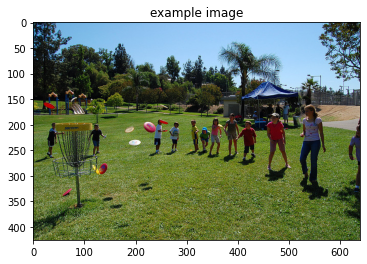

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_load er))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

<a id='step2'></a>
## Step 2: Load Trained Models

In the next code cell we define a `device` that you will use move PyTorch tensors to GPU (if CUDA is available).  Run this code cell before continuing.

In [3]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Before running the code cell below, complete the following tasks.

### Task #1

In the next code cell, you will load the trained encoder and decoder from the previous notebook (**2_Training.ipynb**).  To accomplish this, you must specify the names of the saved encoder and decoder files in the `models/` folder (e.g., these names should be `encoder-5.pkl` and `decoder-5.pkl`, if you trained the model for 5 epochs and saved the weights after each epoch).  

### Task #2

Plug in both the embedding size and the size of the hidden layer of the decoder corresponding to the selected pickle file in `decoder_file`.

In [4]:
# Watch for any changes in model.py, and re-load it automatically.
%load_ext autoreload
%autoreload 2

import os
import torch
from training_incremental_model import Incremental_EncoderCNN, Incremental_DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file = 'incremental_comparative_encoder-1_four_blocks.pkl'
decoder_file = 'incremental_comparitive_decoder-1_four_blocks.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = Incremental_EncoderCNN(embed_size)
encoder.eval()
decoder = Incremental_DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()
# print(os.getcwd())
# address = os.path.join(os.getcwd(),'models', encoder_file)
# # print(address)
# # Load the trained weights.
encoder.encoder.load_state_dict(torch.load(address))
decoder.decoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_file)))

# # Move models to GPU if CUDA is available.
# encoder.to(device)
# decoder.to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
8 1024


RuntimeError: Error(s) in loading state_dict for EncoderCNN:
	Unexpected key(s) in state_dict: "resnet.7.0.conv1.weight", "resnet.7.0.bn1.weight", "resnet.7.0.bn1.bias", "resnet.7.0.bn1.running_mean", "resnet.7.0.bn1.running_var", "resnet.7.0.bn1.num_batches_tracked", "resnet.7.0.conv2.weight", "resnet.7.0.bn2.weight", "resnet.7.0.bn2.bias", "resnet.7.0.bn2.running_mean", "resnet.7.0.bn2.running_var", "resnet.7.0.bn2.num_batches_tracked", "resnet.7.0.conv3.weight", "resnet.7.0.bn3.weight", "resnet.7.0.bn3.bias", "resnet.7.0.bn3.running_mean", "resnet.7.0.bn3.running_var", "resnet.7.0.bn3.num_batches_tracked", "resnet.7.0.downsample.0.weight", "resnet.7.0.downsample.1.weight", "resnet.7.0.downsample.1.bias", "resnet.7.0.downsample.1.running_mean", "resnet.7.0.downsample.1.running_var", "resnet.7.0.downsample.1.num_batches_tracked", "resnet.7.1.conv1.weight", "resnet.7.1.bn1.weight", "resnet.7.1.bn1.bias", "resnet.7.1.bn1.running_mean", "resnet.7.1.bn1.running_var", "resnet.7.1.bn1.num_batches_tracked", "resnet.7.1.conv2.weight", "resnet.7.1.bn2.weight", "resnet.7.1.bn2.bias", "resnet.7.1.bn2.running_mean", "resnet.7.1.bn2.running_var", "resnet.7.1.bn2.num_batches_tracked", "resnet.7.1.conv3.weight", "resnet.7.1.bn3.weight", "resnet.7.1.bn3.bias", "resnet.7.1.bn3.running_mean", "resnet.7.1.bn3.running_var", "resnet.7.1.bn3.num_batches_tracked", "resnet.7.2.conv1.weight", "resnet.7.2.bn1.weight", "resnet.7.2.bn1.bias", "resnet.7.2.bn1.running_mean", "resnet.7.2.bn1.running_var", "resnet.7.2.bn1.num_batches_tracked", "resnet.7.2.conv2.weight", "resnet.7.2.bn2.weight", "resnet.7.2.bn2.bias", "resnet.7.2.bn2.running_mean", "resnet.7.2.bn2.running_var", "resnet.7.2.bn2.num_batches_tracked", "resnet.7.2.conv3.weight", "resnet.7.2.bn3.weight", "resnet.7.2.bn3.bias", "resnet.7.2.bn3.running_mean", "resnet.7.2.bn3.running_var", "resnet.7.2.bn3.num_batches_tracked". 
	size mismatch for embed.weight: copying a param with shape torch.Size([512, 2048]) from checkpoint, the shape in current model is torch.Size([512, 1024]).

In [4]:
encoder

NameError: name 'encoder' is not defined

<a id='step3'></a>
## Step 3: Finish the Sampler

Before executing the next code cell, you must write the `sample` method in the `DecoderRNN` class in **model.py**.  This method should accept as input a PyTorch tensor `features` containing the embedded input features corresponding to a single image.

It should return as output a Python list `output`, indicating the predicted sentence.  `output[i]` is a nonnegative integer that identifies the predicted `i`-th token in the sentence.  The correspondence between integers and tokens can be explored by examining either `data_loader.dataset.vocab.word2idx` (or `data_loader.dataset.vocab.idx2word`).

After implementing the `sample` method, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.  Do **not** modify the code in the cell below. 

In [18]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

example output: [0, 3, 113, 116, 49, 3, 1102, 6, 3, 110, 12, 1, 12, 1, 12, 1, 12, 1, 1, 12]


<a id='step4'></a>
## Step 4: Clean up the Captions

In the code cell below, complete the `clean_sentence` function.  It should take a list of integers (corresponding to the variable `output` in **Step 3**) as input and return the corresponding predicted sentence (as a single Python string). 

In [36]:
# TODO #4: Complete the function.
def clean_sentence(output):
    sentence = ""
    for idx in output:
        if idx == 0:
            continue
        if idx == 1:
            break
        word = data_loader.dataset.vocab.idx2word[idx]
        sentence = sentence + word + ' '
        
    return sentence

After completing the `clean_sentence` function above, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.

In [7]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

example sentence: a baseball player holding a bat on a field . 


<a id='step5'></a>
## Step 5: Generate Predictions!

In the code cell below, we have written a function (`get_prediction`) that you can use to use to loop over images in the test dataset and print your model's predicted caption.

In [33]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    print(image.shape)
    features = encoder(image).unsqueeze(1)
#     print(features)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)
    return features

In [34]:
from PIL import Image
def fetch_image(file_name):
    orig_image = Image.open(file_name).convert('RGB')
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    transform_test = transforms.Compose([ 
        transforms.Resize(256),                          
        transforms.CenterCrop(224),                             
        transforms.ToTensor(),                           
        transforms.Normalize((0.485, 0.456, 0.406),      
                             (0.229, 0.224, 0.225))])
    input_image = transform_test(orig_image)
    return orig_image, input_image
#     image = self.transform(orig_image)
#     print(orig_image)

In [35]:
def generate_caption(input_image):
    print(input_image.shape)
    features = encoder(input_image).unsqueeze(1)
#     print(features.shape)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

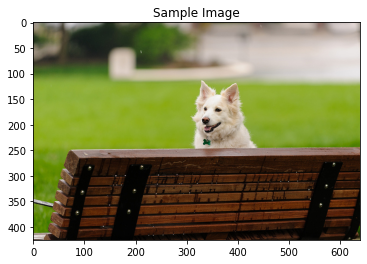

torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
a dog is sitting on a bench in a garden . 


In [37]:
address = os.path.join(os.getcwd(),'images','dog.jpg')
orig_image, input_image = fetch_image(address)
input_image.shape
print(input_image.reshape(1,3,224,224).shape)
generate_caption(input_image.reshape(1,3,224,224).to(device))

Run the code cell below (multiple times, if you like!) to test how this function works.

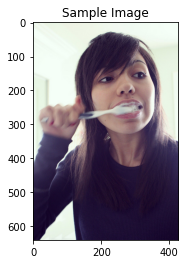

torch.Size([1, 3, 224, 224])
a man with a beard and a black cat . 
torch.Size([1, 1, 512])


In [24]:
features = get_prediction()
print(features.shape)

As the last task in this project, you will loop over the images until you find four image-caption pairs of interest:
- Two should include image-caption pairs that show instances when the model performed well.
- Two should highlight image-caption pairs that highlight instances where the model did not perform well.

Use the four code cells below to complete this task.

### The model performed well!

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively accurate captions.

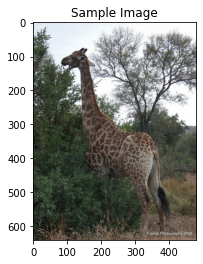

a giraffe standing in a lush green field . 


In [17]:
features = get_prediction()

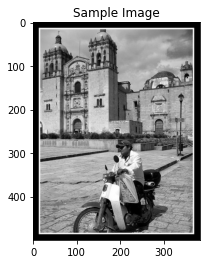

a man riding a bike down a street next to a building . 


In [31]:
get_prediction()

### The model could have performed better ...

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively inaccurate captions.

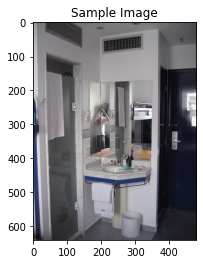

a bathroom with a sink , toilet , and shower . 


In [19]:
get_prediction()

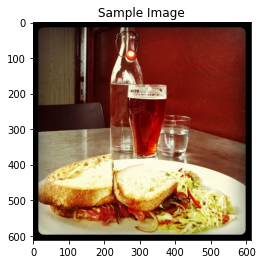

a table with a plate of food and a cup of coffee . 


In [15]:
get_prediction()

In [20]:
modules = list(encoder.resnet.children())
len(modules)

8

In [5]:
import torchvision.models as models
modules_152 = list(models.resnet152(pretrained=True).children())[:-1]
modules_152[-5]

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, ke

In [32]:
# create a list of prime numbers
prime_numbers = [2, 3, 5, 7]

# remove the element at index 2
removed_element = prime_numbers.pop(2)
prime_numbers.pop(2)
print('Removed Element:', removed_element)
print('Updated List:', prime_numbers)

Removed Element: 5
Updated List: [2, 3]
